# Regularization


---


**Assignment Objective:** Assess understanding of regularization techniques in deep learning. Evaluate application and
comparison of different techniques. Enhance knowledge of regularization's role in improving model
generalization.

# Q1. What is regularization in the context of deep learningH Why is it important ?

While in the training of the data, sometimes our model trained too much from the data and become biased to that train data. In such a case model will gives poor accuracy while predicting the outputs for the new data. This problem is called overfitting. And the regularization is the solution of this problem. After using the regularization techniques , our model will save their genralization skills by which our outputs are geranalized and solving the complex problems , even of the new data.These regularization techniques is adding the penality to the cost functions. These are some common regulizers , which are used for reducing the impact of the overfitting.

- lasso Regularization (L1)
- ridge regularization (L2)
- Elasticnet regularization (L1+L2)
- Droupout regularization

# Q2. Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff ?

**Bias varience Tradeoff :**

High bias --------> Underfitting of the model.
High Verience --------> Overfitting of the model.

A perfect model should -----------> Low bias and Low varience

Regularization help to reducing the biases and verience by adding the penality terms to the cost functions. By which the cofficient of the model will become large and able to solve the complex problems without overfitting or underfitting.

- Regularization methods, such as L1 and L2 regularization, add a penalty to the loss function based on the complexity of the model. Which is helping to reduce the high bias of the training data.

- In the case of L1 regularization, which adds a penalty based on the absolute values of the weights, it encourages sparsity in the model. This means that some weights may be exactly zero, effectively performing feature selection. Feature selection can help address high bias by allowing the model to focus on the most relevant features.

# Q3. Describe the concept of L1 and L2 regularization. How do they differ in terms of penalty calculation and their effects on the model ?

L1 and L2 both are the regularizations for reducing the impact of overfitting of the model by adding the penality terms to the model. However they both work in a different manner.

**L1 Regularization :**

In L1 regularization, the penalty term is proportional to the sum of the absolute values of the model parameters (weights).

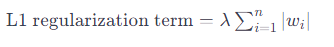


This regularization is also called lasso Regularization. This is basically shrinkage the unimportant features of the dataset and make them zero. Which means the feature selection feature is also available in this L1 Regularization technique.It gives the sparse solutions.


**L2 Regularization (Ridge) :**

In L2 regularization, the penalty term is proportional to the sum of the squared values of the model parameters (weights).

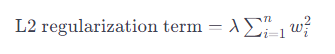

As L1 regularization , L2 has no any feature selection ability. It reduces the cofficient but not till zero. It is used for complex problems.



# Q4. Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.

Regularization techniques are very usefull to preventing the overfitting of the model. Which is accured when our model is too much learned by the training data. The varience is captured too much noise from the data and become biased for the prediction of the new data set. The regularization is adding the penality terms to the cost functions of the models by which the bias and verience of the data has reduced and our model will become gernalize while predicting the new data.Some of the regularization such as L1 has capicity to the feature selection as it make those feature to zero, which has very low significance for the output.Which means noise reduction also done by the regularization which is another cause of reducing the overfitting.

# Q5. Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference ?

Droupout regularization is also a very usefull regularization technique in the neuoral networks. It working processes is different from the other regularizations. As it randomaly off the x% of neuorones in each itrestion of the training data.And divide the rest neuorones by 1/1-x%.
This emphasises on the genralization of model, which reducing the impact of outliers while predicting the outputs. and incresed the model perfromance.

# Q6. Describe the concept of Early stopping as a form of regularization. How does it help prevent overfitting during the training process ?

The concept of Early stoping , which is genrally a callback function can also helps us to reduce the overfitting of the model.As it stop the traing of the data , when the validation loss doest not improved for a number of epochs.In other words by the Early stoping the training will automatically stoped , when it did'nt find any improvment in the learning process while backward propagation. It will cease to a model to be over trained. And similarly model is escape from the problem of overfitting.

# Q7.Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting ?

Batch Normalization (BN) works by normalizing the inputs of each layer in a neural network during training. It subtracts the mean and divides by the standard deviation, followed by scaling and shifting. This process stabilizes training by reducing internal covariate shift. BN acts as regularization by adding a slight noise during training, preventing overfitting, and allows for faster convergence with larger learning rates. It contributes to improved generalization and reduces sensitivity to weight initialization and hyperparameter choices.







# Q8. Implement Dropout regularization in a deep learning model using a framework of your choice. Evaluate its impact on model performance and compare it with a model without Dropout .

# Without Regularization

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
# spliting the data into train and test data
(x_train_full ,y_train_full),(x_test ,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_full.shape

(60000, 28, 28)

In [6]:
# defining the validation data
x_valid = x_train_full[:5000]
y_valid= y_train_full[:5000]

In [7]:
print(x_valid.shape)
print(y_valid.shape)

(5000, 28, 28)
(5000,)


In [8]:
# resassigning the train data
x_train = x_train_full[5000:]
y_train = y_train_full[5000:]

In [9]:
print(x_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


In [10]:
x_train.max()

255

In [11]:
# normalizing the x data
x_train,x_valid, x_test = x_train / 255,x_valid/255 ,x_test / 255

In [12]:
layers= [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
]


In [13]:
model_classifier= tf.keras.models.Sequential(layers)

In [14]:
model_classifier.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model_classifier.fit(x_train,y_train , epochs=20 , validation_data= (x_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6723 - accuracy: 0.8357 - val_loss: 0.3642 - val_accuracy: 0.9024
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3490 - accuracy: 0.9030 - val_loss: 0.2954 - val_accuracy: 0.9178
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2997 - accuracy: 0.9150 - val_loss: 0.2628 - val_accuracy: 0.9266
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.9238 - val_loss: 0.2404 - val_accuracy: 0.9346
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2458 - accuracy: 0.9311 - val_loss: 0.2217 - val_accuracy: 0.9386
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2266 - accuracy: 0.9366 - val_loss: 0.2067 - val_accuracy: 0.9434
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2102 - accuracy: 0.9416 - val_loss: 0.1942 - val_accuracy:

In [21]:
model_classifier.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9629


[0.12146671116352081, 0.9628999829292297]

# with Dropout Regularization

In [23]:
layers= [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dropout(0.5), # ---------------------> Dropout layer1
    tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5), # ---------------------> Dropout layer2
    tf.keras.layers.Dense(10, activation='softmax')
]


In [24]:
model_classifier= tf.keras.models.Sequential(layers)

In [25]:
model_classifier.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model_classifier.fit(x_train,y_train , epochs=20 , validation_data= (x_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 3ms/step - loss: 1.1249 - accuracy: 0.6319 - val_loss: 0.4607 - val_accuracy: 0.8852
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6915 - accuracy: 0.7820 - val_loss: 0.3621 - val_accuracy: 0.9078
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6020 - accuracy: 0.8111 - val_loss: 0.3138 - val_accuracy: 0.9168
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5455 - accuracy: 0.8305 - val_loss: 0.2811 - val_accuracy: 0.9278
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5137 - accuracy: 0.8411 - val_loss: 0.2601 - val_accuracy: 0.9334
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4826 - accuracy: 0.8502 - val_loss: 0.2459 - val_accuracy: 0.9342
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4594 - accuracy: 0.8584 - val_loss: 0.2315 - val_accuracy:

In [27]:
model_classifier.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9581


[0.1539294272661209, 0.9581000208854675]

- L1 Regularization is prefrable when feature selection is important or when dealing with high-dimensional data where some features may be irrelevant or redundant.As text classification.

- L2 is best when we controlling the magnitude of weights and preventing them from becoming too large. Generally suitable for a wide range of problems.And when smoothness is required ..ie..image processing.

- combined l1 and l2 , which is elastic net regularization is usefull when we have a highdimensional data. It is best for regression problems.

- Dropout will recomended for Neural networks, especially deep architectures, to prevent overfitting and improve generalization...ie..CNN.